In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# Load training and testing datasets
data1 = pd.read_csv('/home/niels/cdac Dropbox/Niels Turley/codes/data/mgh_2332.csv')  # Training data
data2 = pd.read_csv('/home/niels/cdac Dropbox/Niels Turley/codes/data/bidmc_3280.csv')  # Testing data

# Define a text feature extractor using TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))  # Uses unigrams, bigrams, and trigrams

# Define class weights to handle class imbalance (class 1 is weighted more heavily)
class_weights = {0: 1.0, 1: 3.0}

# Define the classification model (Logistic Regression)
model = LogisticRegression(solver='liblinear', class_weight=class_weights, random_state=2025)

# Define a preprocessor to handle both text and numeric data
preprocessor = ColumnTransformer([
    ('vectorizer', vectorizer, 'report_text'),  # Apply TF-IDF to the 'report_text' column
    ('scaler', StandardScaler(), ['icd', 'med'])  # Standardize 'icd' and 'med' columns
], n_jobs=-1)

# Create a pipeline that first preprocesses the data and then applies the classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Data preprocessing step
    ('classifier', model)  # Classification step
])

# Define a grid of hyperparameters for tuning using grid search
param_grid = {
    'classifier__penalty': ['l1'],  # L1 regularization
    'classifier__C': [0.01, 0.1, 1.0, 10.0]  # Range of inverse regularization strengths
}

# Use GridSearchCV to find the best hyperparameters with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, n_jobs=-1,param_grid=param_grid, cv=5)
grid_search.fit(data1[['icd', 'med', 'report_text']], data1['annot'])  # Train on the data1 dataset

# Output the best parameters and score from the grid search
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Test the model on the testing dataset (data2)
X_test_data2 = data2[['icd', 'med', 'report_text']]
y_test_data2 = data2['annot']
y_pred_data2 = grid_search.predict(X_test_data2)

# Calculate evaluation metrics (accuracy, precision, recall, F1 score) and confusion matrix on data2
accuracy_data2 = accuracy_score(y_test_data2, y_pred_data2)
precision_data2 = precision_score(y_test_data2, y_pred_data2)
recall_data2 = recall_score(y_test_data2, y_pred_data2)
f1_data2 = f1_score(y_test_data2, y_pred_data2)
cm_data2 = confusion_matrix(y_test_data2, y_pred_data2)

# Output the evaluation metrics and confusion matrix for data2
print("Accuracy:", accuracy_data2)
print("Precision:", precision_data2)
print("Recall:", recall_data2)
print("F1 Score:", f1_data2)
print("Confusion Matrix:")
print(cm_data2)

# Calculate and print the ROC AUC score for the model on data2
y_pred_prob = grid_search.predict_proba(X_test_data2)[:, 1]  # Get the probability of the positive class
roc_auc = roc_auc_score(y_test_data2, y_pred_prob)  # Calculate AUC using true labels and predicted probabilities
print("AUC:", roc_auc)


Best Parameters:  {'classifier__C': 10.0, 'classifier__penalty': 'l1'}
Best Score:  0.9502495152144543
Accuracy: 0.9094512195121951
Precision: 0.7948990435706695
Recall: 0.8779342723004695
F1 Score: 0.8343558282208589
Confusion Matrix:
[[2235  193]
 [ 104  748]]
AUC: 0.9451090466467118


Best Parameters:  {'classifier__C': 10.0, 'classifier__penalty': 'l1'}
Best Score:  0.9502495152144543
Results for MGH train BI test 2332 vs 3280:
Accuracy: 0.9094512195121951
Precision: 0.7948990435706695
Recall: 0.8779342723004695
F1 Score: 0.8343558282208589
Confusion Matrix:
[[2235  193]
 [ 104  748]]
AUC: 0.9451037291845527

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# Load training and testing datasets
data3 = pd.read_csv('/home/niels/cdac Dropbox/Niels Turley/codes/data/bidmc_3280.csv')  # Training dataset
data4 = pd.read_csv('/home/niels/cdac Dropbox/Niels Turley/codes/data/mgh_2332.csv')  # Testing dataset

# Define text feature extractor using TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))  # Uses unigrams, bigrams, and trigrams

# Define class weights to handle class imbalance (class 1 is weighted more heavily)
class_weights = {0: 1.0, 1: 3.0}

# Define the classification model (Logistic Regression)
model = LogisticRegression(solver='liblinear', class_weight=class_weights, random_state=2025)

# Define a preprocessor to handle both text and numeric data
preprocessor = ColumnTransformer([
    ('vectorizer', vectorizer, 'report_text'),  # Apply TF-IDF to the 'report_text' column
    ('scaler', StandardScaler(), ['icd', 'med'])  # Standardize 'icd' and 'med' columns
], n_jobs=-1)

# Create a pipeline that first preprocesses the data and then applies the classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Data preprocessing step
    ('classifier', model)  # Classification step
])

# Define a grid of hyperparameters for tuning using grid search
param_grid = {
    'classifier__penalty': ['l1'],  # L1 regularization
    'classifier__C': [0.01, 0.1, 1.0, 10.0]  # Range of inverse regularization strengths
}

# Use GridSearchCV to find the best hyperparameters with 5-fold cross-validation
grid_search1 = GridSearchCV(pipeline, n_jobs=-1, param_grid=param_grid, cv=5)
grid_search1.fit(data3[['icd', 'med', 'report_text']], data3['annot'])  # Train on the data3 dataset

# Output the best parameters and score from the grid search
print("Best Parameters: ", grid_search1.best_params_)
print("Best Score: ", grid_search1.best_score_)

# Test the model on the testing dataset (data4)
X_test_data4 = data4[['icd', 'med', 'report_text']]
y_test_data4 = data4['annot']
y_pred_data4 = grid_search1.predict(X_test_data4)

# Calculate evaluation metrics (accuracy, precision, recall, F1 score) and confusion matrix on data4
accuracy_data4 = accuracy_score(y_test_data4, y_pred_data4)
precision_data4 = precision_score(y_test_data4, y_pred_data4)
recall_data4 = recall_score(y_test_data4, y_pred_data4)
f1_data4 = f1_score(y_test_data4, y_pred_data4)
cm_data4 = confusion_matrix(y_test_data4, y_pred_data4)

# Output the evaluation metrics and confusion matrix for data4
print("Results for BI train MGH test (3280 vs 2332):")
print("Accuracy:", accuracy_data4)
print("Precision:", precision_data4)
print("Recall:", recall_data4)
print("F1 Score:", f1_data4)
print("Confusion Matrix:")
print(cm_data4)

# Calculate and print the ROC AUC score for the model on data4
y_pred_prob = grid_search1.predict_proba(X_test_data4)[:, 1]  # Get the probability of the positive class
roc_auc = roc_auc_score(y_test_data4, y_pred_prob)  # Calculate AUC using true labels and predicted probabilities
print("AUC:", roc_auc)


Best Parameters:  {'classifier__C': 10.0, 'classifier__penalty': 'l1'}
Best Score:  0.9137195121951219
Results for BI train MGH test (3280 vs 2332):
Accuracy: 0.9451114922813036
Precision: 0.9149855907780979
Recall: 0.9019886363636364
F1 Score: 0.9084406294706724
Confusion Matrix:
[[1569   59]
 [  69  635]]
AUC: 0.9780571183270047


Best Parameters:  {'classifier__C': 10.0, 'classifier__penalty': 'l1'}
Best Score:  0.9137195121951219
Results for  BI train MGH test 3280 vs 2332
Accuracy: 0.9451114922813036
Precision: 0.9149855907780979
Recall: 0.9019886363636364
F1 Score: 0.9084406294706724
Confusion Matrix:
[[1569   59]
 [  69  635]]
AUC: 0.9451037291845527
AUC: 0.9780492656913112

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

# Load training and testing datasets
data5 = pd.read_csv('/home/niels/cdac Dropbox/Niels Turley/codes/data/mgh_1652.csv')  # Training dataset
data6 = pd.read_csv('/home/niels/cdac Dropbox/Niels Turley/codes/data/mgh_680.csv')   # Testing dataset

# Define text feature extractor using TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))  # Includes unigrams, bigrams, and trigrams

# Define class weights to handle class imbalance (class 1 is weighted more heavily)
class_weights = {0: 1.0, 1: 3.0}

# Define the classification model (Logistic Regression)
model = LogisticRegression(solver='liblinear', class_weight=class_weights, random_state=2025)

# Define a preprocessor to handle both text and numeric data
preprocessor = ColumnTransformer([
    ('vectorizer', vectorizer, 'report_text'),  # Apply TF-IDF to the 'report_text' column
    ('scaler', StandardScaler(), ['icd', 'med'])  # Standardize 'icd' and 'med' columns
], n_jobs=-1)

# Create a pipeline that first preprocesses the data and then applies the classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Data preprocessing step
    ('classifier', model)  # Classification step
])

# Define a grid of hyperparameters for tuning using grid search
param_grid = {
    'classifier__penalty': ['l1'],  # L1 regularization
    'classifier__C': [0.01, 0.1, 1.0, 10.0]  # Range of inverse regularization strengths
}

# Use GridSearchCV to find the best hyperparameters with 5-fold cross-validation
grid_search2 = GridSearchCV(pipeline, n_jobs=-1, param_grid=param_grid, cv=5)
grid_search2.fit(data5[['icd', 'med', 'report_text']], data5['annot'])  # Train on the data5 dataset

# Output the best parameters and score from the grid search
print("Best Parameters: ", grid_search2.best_params_)
print("Best Score: ", grid_search2.best_score_)

# Test the model on the testing dataset (data6)
X_test_data6 = data6[['icd', 'med', 'report_text']]
y_test_data6 = data6['annot']
y_pred_data6 = grid_search2.predict(X_test_data6)

# Calculate evaluation metrics (accuracy, precision, recall, F1 score) and confusion matrix on data6
accuracy_data6 = accuracy_score(y_test_data6, y_pred_data6)
precision_data6 = precision_score(y_test_data6, y_pred_data6)
recall_data6 = recall_score(y_test_data6, y_pred_data6)
f1_data6 = f1_score(y_test_data6, y_pred_data6)
cm_data6 = confusion_matrix(y_test_data6, y_pred_data6)

# Output the evaluation metrics and confusion matrix for data6
print("Results for 3 MGH train MGH test 1652 vs 680:")
print("Accuracy:", accuracy_data6)
print("Precision:", precision_data6)
print("Recall:", recall_data6)
print("F1 Score:", f1_data6)
print("Confusion Matrix:")
print(cm_data6)

# Calculate and print the ROC AUC score for the model on data6
y_pred_prob = grid_search2.predict_proba(X_test_data6)[:, 1]  # Get the probability of the positive class
roc_auc_data6 = roc_auc_score(y_test_data6, y_pred_prob)  # Calculate AUC using true labels and predicted probabilities
print("AUC:", roc_auc_data6)


Best Parameters:  {'classifier__C': 10.0, 'classifier__penalty': 'l1'}
Best Score:  0.9582312551496841
Results for 3 MGH train MGH test 1652 vs 680:
Accuracy: 0.9470588235294117
Precision: 0.9817073170731707
Recall: 0.9147727272727273
F1 Score: 0.9470588235294117
Confusion Matrix:
[[322   6]
 [ 30 322]]
AUC: 0.9807112666297118


Best Parameters:  {'classifier__C': 10.0, 'classifier__penalty': 'l1'}
Best Score:  0.9582312551496841
Results for  3 MGH train MGH test  1652 vs 680
Accuracy: 0.9470588235294117
Precision: 0.9817073170731707
Recall: 0.9147727272727273
F1 Score: 0.9470588235294117
Confusion Matrix:
[[322   6]
 [ 30 322]]
AUC: 0.9807199279379157

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Load training and testing datasets
data7 = pd.read_csv('/home/niels/cdac Dropbox/Niels Turley/codes/data/bidmc_2296.csv')  # Training dataset
data8 = pd.read_csv('/home/niels/cdac Dropbox/Niels Turley/codes/data/bidmc_984.csv')   # Testing dataset

# Define the text feature extractor using TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))  # Includes unigrams, bigrams, and trigrams

# Define class weights to handle class imbalance (class 1 is weighted more heavily)
class_weights = {0: 1.0, 1: 3.0}

# Define the classification model (Logistic Regression)
model = LogisticRegression(solver='liblinear', class_weight=class_weights, random_state=2025)

# Define a preprocessor to handle both text and numeric data
preprocessor = ColumnTransformer([
    ('vectorizer', vectorizer, 'report_text'),  # Apply TF-IDF to the 'report_text' column
    ('scaler', StandardScaler(), ['icd', 'med'])  # Standardize 'icd' and 'med' columns
], n_jobs=-1)

# Create a pipeline that first preprocesses the data and then applies the classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Data preprocessing step
    ('classifier', model)  # Classification step
])

# Define a grid of hyperparameters for tuning using grid search
param_grid = {
    'classifier__penalty': ['l1'],  # L1 regularization
    'classifier__C': [0.01, 0.1, 1.0, 8.0]  # Range of inverse regularization strengths
}

# Use GridSearchCV to find the best hyperparameters with 5-fold cross-validation
grid_search3 = GridSearchCV(pipeline, n_jobs=-1, param_grid=param_grid, cv=5)
grid_search3.fit(data7[['icd', 'med', 'report_text']], data7['annot'])  # Train on the data7 dataset

# Output the best parameters and score from the grid search
print("Best Parameters: ", grid_search3.best_params_)
print("Best Score: ", grid_search3.best_score_)

# Test the model on the testing dataset (data8)
X_test_data8 = data8[['icd', 'med', 'report_text']]
y_test_data8 = data8['annot']
y_pred_data8 = grid_search3.predict(X_test_data8)

# Calculate evaluation metrics (accuracy, precision, recall, F1 score) and confusion matrix on data8
accuracy_data8 = accuracy_score(y_test_data8, y_pred_data8)
precision_data8 = precision_score(y_test_data8, y_pred_data8)
recall_data8 = recall_score(y_test_data8, y_pred_data8)
f1_data8 = f1_score(y_test_data8, y_pred_data8)
cm_data8 = confusion_matrix(y_test_data8, y_pred_data8)

# Output the evaluation metrics and confusion matrix for data8
print("Results for 4 BI train BI test 50% annot=1 2296 vs 984:")
print("Accuracy:", accuracy_data8)
print("Precision:", precision_data8)
print("Recall:", recall_data8)
print("F1 Score:", f1_data8)
print("Confusion Matrix:")
print(cm_data8)

# Calculate and print the ROC AUC score for the model on data8
y_pred_prob = grid_search3.predict_proba(X_test_data8)[:, 1]  # Get the probability of the positive class
roc_auc_data8 = roc_auc_score(y_test_data8, y_pred_prob)  # Calculate AUC using true labels and predicted probabilities
print("AUC:", roc_auc_data8)


Best Parameters:  {'classifier__C': 8.0, 'classifier__penalty': 'l1'}
Best Score:  0.8963237662214645
Results for 4 BI train BI test 50% annot=1 2296 vs 984:
Accuracy: 0.8770325203252033
Precision: 0.8237791932059448
Recall: 0.9107981220657277
F1 Score: 0.8651059085841695
Confusion Matrix:
[[475  83]
 [ 38 388]]
AUC: 0.9479192959429216


Best Parameters:  {'classifier__C': 8.0, 'classifier__penalty': 'l1'}
Best Score:  0.8963237662214645
Results for  4 BI train BI test 50% annot=1 2296 vs 984
Accuracy: 0.8770325203252033
Precision: 0.8237791932059448
Recall: 0.9107981220657277
F1 Score: 0.8651059085841695
Confusion Matrix:
[[475  83]
 [ 38 388]]
AUC: 0.9479277096269373

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Load training and testing datasets
data9 = pd.read_csv('/home/niels/cdac Dropbox/Niels Turley/codes/data/mgh_bidmc_3948.csv')  # Training dataset
data10 = pd.read_csv('/home/niels/cdac Dropbox/Niels Turley/codes/data/mgh_bidmc_1664.csv')  # Testing dataset

# Define the text feature extractor using TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))  # Includes unigrams, bigrams, and trigrams

# Define class weights to handle class imbalance (class 1 is weighted more heavily)
class_weights = {0: 1.0, 1: 3.0}

# Define the classification model (Logistic Regression)
model = LogisticRegression(solver='liblinear', class_weight=class_weights, random_state=2025)

# Define a preprocessor to handle both text and numeric data
preprocessor = ColumnTransformer([
    ('vectorizer', vectorizer, 'report_text'),  # Apply TF-IDF to the 'report_text' column
    ('scaler', StandardScaler(), ['icd', 'med'])  # Standardize 'icd' and 'med' columns
], n_jobs=-1)

# Create a pipeline that first preprocesses the data and then applies the classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Data preprocessing step
    ('classifier', model)  # Classification step
])

# Define a grid of hyperparameters for tuning using grid search
param_grid = {
    'classifier__penalty': ['l1'],  # L1 regularization
    'classifier__C': [0.01, 0.1, 1.0, 10.0]  # Range of inverse regularization strengths
}

# Use GridSearchCV to find the best hyperparameters with 5-fold cross-validation
grid_search4 = GridSearchCV(pipeline, n_jobs=-1, param_grid=param_grid, cv=5)
grid_search4.fit(data9[['icd', 'med', 'report_text']], data9['annot'])  # Train on the data9 dataset

# Output the best parameters and score from the grid search
print("Best Parameters: ", grid_search4.best_params_)
print("Best Score: ", grid_search4.best_score_)

# Test the model on the testing dataset (data10)
X_test_data10 = data10[['icd', 'med', 'report_text']]
y_test_data10 = data10['annot']
y_pred_data10 = grid_search4.predict(X_test_data10)

# Calculate evaluation metrics (accuracy, precision, recall, F1 score) and confusion matrix on data10
accuracy_data10 = accuracy_score(y_test_data10, y_pred_data10)
precision_data10 = precision_score(y_test_data10, y_pred_data10)
recall_data10 = recall_score(y_test_data10, y_pred_data10)
f1_data10 = f1_score(y_test_data10, y_pred_data10)
cm_data10 = confusion_matrix(y_test_data10, y_pred_data10)

# Output the evaluation metrics and confusion matrix for data10
print("Results for 5 MGH+BI train MGH+BI test 3+4 3948 vs 1664:")
print("Accuracy:", accuracy_data10)
print("Precision:", precision_data10)
print("Recall:", recall_data10)
print("F1 Score:", f1_data10)
print("Confusion Matrix:")
print(cm_data10)

# Calculate and print the ROC AUC score for the model on data10
y_pred_prob = grid_search4.predict_proba(X_test_data10)[:, 1]  # Get the probability of the positive class
roc_auc_data10 = roc_auc_score(y_test_data10, y_pred_prob)  # Calculate AUC using true labels and predicted probabilities
print("AUC:", roc_auc_data10)


Best Parameters:  {'classifier__C': 1.0, 'classifier__penalty': 'l1'}
Best Score:  0.8941525083826667
Results for 5 MGH+BI train MGH+BI test 3+4 3948 vs 1664:
Accuracy: 0.8894230769230769
Precision: 0.8837209302325582
Recall: 0.8791773778920309
F1 Score: 0.8814432989690721
Confusion Matrix:
[[796  90]
 [ 94 684]]
AUC: 0.9484163828071048


In [16]:
import joblib

In [17]:
joblib.dump(grid_search4, 'mci_ad_model.pkl')

['mci_ad_model.pkl']

Best Parameters:  {'classifier__C': 1.0, 'classifier__penalty': 'l1'}
Best Score:  0.8941525083826667
Results for  5 MGH+BI  train   MGH+BI  test 3+4 3948 vs 1664
Accuracy: 0.8894230769230769
Precision: 0.8837209302325582
Recall: 0.8791773778920309
F1 Score: 0.8814432989690721
Confusion Matrix:
[[796  90]
 [ 94 684]]
AUC: 0.9546313114021597

In [7]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Load the new test dataset
data11 = pd.read_csv('/home/niels/cdac Dropbox/Niels Turley/codes/data/mgh_680.csv')

# Prepare the features (X) and the target variable (y) from the dataset
X_test_data11 = data11[['icd', 'med', 'report_text']]
y_test_data11 = data11['annot']

# Make predictions on the test set (ensure grid_search4 is fitted before this)
y_pred_data11 = grid_search4.predict(X_test_data11)

# Calculate the evaluation metrics
accuracy_data11 = accuracy_score(y_test_data11, y_pred_data11)
precision_data11 = precision_score(y_test_data11, y_pred_data11)
recall_data11 = recall_score(y_test_data11, y_pred_data11)
f1_data11 = f1_score(y_test_data11, y_pred_data11)
cm_data11 = confusion_matrix(y_test_data11, y_pred_data11)

# Output the evaluation metrics and confusion matrix
print("Results for 6 MGH+BI train MGH test 3+4 3948 vs 680")
print("Accuracy:", accuracy_data11)
print("Precision:", precision_data11)
print("Recall:", recall_data11)
print("F1 Score:", f1_data11)
print("Confusion Matrix:")
print(cm_data11)

# Calculate the AUC score (Area Under the ROC Curve)
y_pred_prob = grid_search4.predict_proba(X_test_data11)[:, 1]  # Get the probabilities for the positive class

roc_auc_data11 = roc_auc_score(y_test_data11, y_pred_prob)
print("AUC:", roc_auc_data11)


Results for 6 MGH+BI train MGH test 3+4 3948 vs 680
Accuracy: 0.9323529411764706
Precision: 0.9608433734939759
Recall: 0.90625
F1 Score: 0.9327485380116959
Confusion Matrix:
[[315  13]
 [ 33 319]]
AUC: 0.979368763858093


Results for 6 MGH+BI  train   MGH  test 3+4 3948 vs 680
Accuracy: 0.9323529411764706
Precision: 0.9608433734939759
Recall: 0.90625
F1 Score: 0.9327485380116959
Confusion Matrix:
[[315  13]
 [ 33 319]]
AUC: 0.979368763858093

In [8]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Load the test dataset
data12 = pd.read_csv('/home/niels/cdac Dropbox/Niels Turley/codes/data/bidmc_984.csv')

# Prepare features (X) and target variable (y) from the dataset
X_test_data12 = data12[['icd', 'med', 'report_text']]
y_test_data12 = data12['annot']

# Make sure the model (grid_search4) is already trained on the training data
y_pred_data12 = grid_search4.predict(X_test_data12)

# Calculate evaluation metrics
accuracy_data12 = accuracy_score(y_test_data12, y_pred_data12)
precision_data12 = precision_score(y_test_data12, y_pred_data12)
recall_data12 = recall_score(y_test_data12, y_pred_data12)
f1_data12 = f1_score(y_test_data12, y_pred_data12)
cm_data12 = confusion_matrix(y_test_data12, y_pred_data12)

# Output evaluation metrics and confusion matrix
print("Results for 7 MGH+BI train BI test 3+4 3948 vs 984")
print("Accuracy:", accuracy_data12)
print("Precision:", precision_data12)
print("Recall:", recall_data12)
print("F1 Score:", f1_data12)
print("Confusion Matrix:")
print(cm_data12)

# Calculate the AUC score (Area Under the ROC Curve)
y_pred_prob = grid_search4.predict_proba(X_test_data12)[:, 1]  # Get probabilities for the positive class

roc_auc_data12 = roc_auc_score(y_test_data12, y_pred_prob)
print("AUC:", roc_auc_data12)


Results for 7 MGH+BI train BI test 3+4 3948 vs 984
Accuracy: 0.8597560975609756
Precision: 0.8257918552036199
Recall: 0.8568075117370892
F1 Score: 0.8410138248847926
Confusion Matrix:
[[481  77]
 [ 61 365]]
AUC: 0.923772022817911


Results for 7 MGH+BI  train   BI  test 3+4 3948 vs 984
Accuracy: 0.8597560975609756
Precision: 0.8257918552036199
Recall: 0.8568075117370892
F1 Score: 0.8410138248847926
Confusion Matrix:
[[481  77]
 [ 61 365]]
AUC: 0.9237762296599189

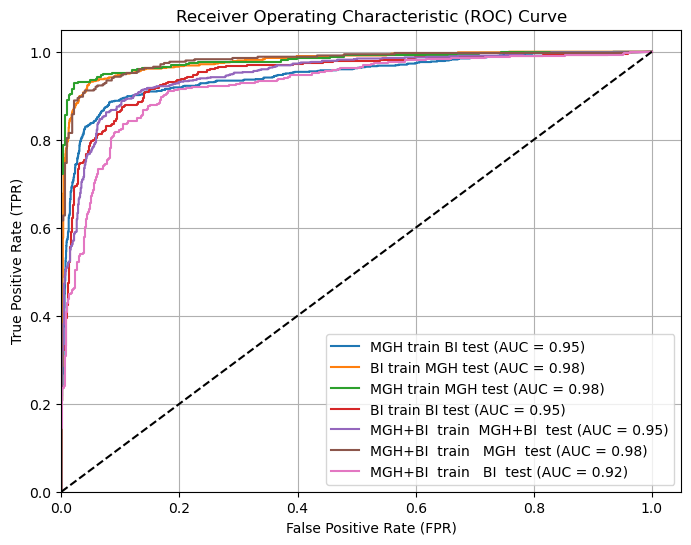

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve data for data2
y_pred_prob_data2 = grid_search.predict_proba(X_test_data2)[:, 1]  # Get the probability for the positive class
fpr_data2, tpr_data2, thresholds_data2 = roc_curve(y_test_data2, y_pred_prob_data2)  # Compute FPR and TPR
auc_data2 = roc_auc_score(y_test_data2, y_pred_prob_data2)  # Calculate AUC for data2

# Calculate the ROC curve data for data4
y_pred_prob_data4 = grid_search1.predict_proba(X_test_data4)[:, 1]  # Get the probability for the positive class
fpr_data4, tpr_data4, thresholds_data4 = roc_curve(y_test_data4, y_pred_prob_data4)  # Compute FPR and TPR
auc_data4 = roc_auc_score(y_test_data4, y_pred_prob_data4)  # Calculate AUC for data4

# Calculate the ROC curve data for data6
y_pred_prob_data6 = grid_search2.predict_proba(X_test_data6)[:, 1]  # Get the probability for the positive class
fpr_data6, tpr_data6, thresholds_data6 = roc_curve(y_test_data6, y_pred_prob_data6)  # Compute FPR and TPR
auc_data6 = roc_auc_score(y_test_data6, y_pred_prob_data6)  # Calculate AUC for data6

# Calculate the ROC curve data for data8
y_pred_prob_data8 = grid_search3.predict_proba(X_test_data8)[:, 1]  # Get the probability for the positive class
fpr_data8, tpr_data8, thresholds_data8 = roc_curve(y_test_data8, y_pred_prob_data8)  # Compute FPR and TPR
auc_data8 = roc_auc_score(y_test_data8, y_pred_prob_data8)  # Calculate AUC for data8

# Calculate the ROC curve data for data10
y_pred_prob_data10 = grid_search4.predict_proba(X_test_data10)[:, 1]  # Get the probability for the positive class
fpr_data10, tpr_data10, thresholds_data10 = roc_curve(y_test_data10, y_pred_prob_data10)  # Compute FPR and TPR
auc_data10 = roc_auc_score(y_test_data10, y_pred_prob_data10)  # Calculate AUC for data10

# Calculate the ROC curve data for data11
y_pred_prob_data11 = grid_search4.predict_proba(X_test_data11)[:, 1]  # Get the probability for the positive class
fpr_data11, tpr_data11, thresholds_data11 = roc_curve(y_test_data11, y_pred_prob_data11)  # Compute FPR and TPR
auc_data11 = roc_auc_score(y_test_data11, y_pred_prob_data11)  # Calculate AUC for data11

# Calculate the ROC curve data for data12
y_pred_prob_data12 = grid_search4.predict_proba(X_test_data12)[:, 1]  # Get the probability for the positive class
fpr_data12, tpr_data12, thresholds_data12 = roc_curve(y_test_data12, y_pred_prob_data12)  # Compute FPR and TPR
auc_data12 = roc_auc_score(y_test_data12, y_pred_prob_data12)  # Calculate AUC for data12

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_data2, tpr_data2, label=f'MGH train BI test (AUC = {auc_data2:.2f})')
plt.plot(fpr_data4, tpr_data4, label=f'BI train MGH test (AUC = {auc_data4:.2f})')
plt.plot(fpr_data6, tpr_data6, label=f'MGH train MGH test (AUC = {auc_data6:.2f})')
plt.plot(fpr_data8, tpr_data8, label=f'BI train BI test (AUC = {auc_data8:.2f})')
plt.plot(fpr_data10, tpr_data10, label=f'MGH+BI  train  MGH+BI  test (AUC = {auc_data10:.2f})')
plt.plot(fpr_data11, tpr_data11, label=f'MGH+BI  train   MGH  test (AUC = {auc_data11:.2f})')
plt.plot(fpr_data12, tpr_data12, label=f'MGH+BI  train   BI  test (AUC = {auc_data12:.2f})')

# Plot the diagonal line (representing random guessing)
plt.plot([0, 1], [0, 1], 'k--')

# Set up the plot properties
plt.xlim([0.0, 1.0])  # Set x-axis range
plt.ylim([0.0, 1.0])  # Set y-axis range
plt.xlabel('False Positive Rate (FPR)')  # Label for the x-axis
plt.ylabel('True Positive Rate (TPR)')  # Label for the y-axis
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Title of the plot
plt.legend(loc="lower right")  # Legend placement
plt.grid(True)  # Show grid
plt.xlim([0.0, 1.05])  # Expand x-axis range slightly
plt.ylim([0.0, 1.05])  # Expand y-axis range slightly

# Show the plot
plt.show()


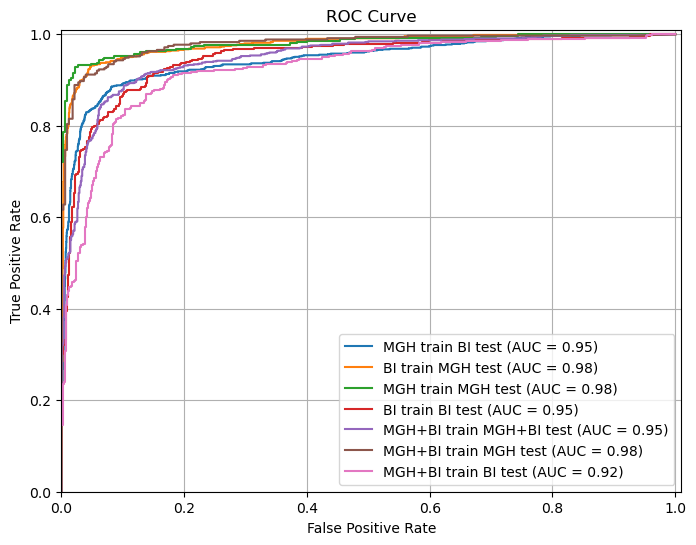

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve data for data2
fpr_data2, tpr_data2, _ = roc_curve(y_test_data2, y_pred_prob_data2)  # FPR and TPR values
auc_data2 = auc(fpr_data2, tpr_data2)  # Compute AUC for data2

# Calculate ROC curve data for data4
fpr_data4, tpr_data4, _ = roc_curve(y_test_data4, y_pred_prob_data4)  # FPR and TPR values
auc_data4 = auc(fpr_data4, tpr_data4)  # Compute AUC for data4

# Calculate ROC curve data for data6
fpr_data6, tpr_data6, _ = roc_curve(y_test_data6, y_pred_prob_data6)  # FPR and TPR values
auc_data6 = auc(fpr_data6, tpr_data6)  # Compute AUC for data6

# Calculate ROC curve data for data8
fpr_data8, tpr_data8, _ = roc_curve(y_test_data8, y_pred_prob_data8)  # FPR and TPR values
auc_data8 = auc(fpr_data8, tpr_data8)  # Compute AUC for data8

# Calculate ROC curve data for data10
fpr_data10, tpr_data10, _ = roc_curve(y_test_data10, y_pred_prob_data10)  # FPR and TPR values
auc_data10 = auc(fpr_data10, tpr_data10)  # Compute AUC for data10

# Calculate ROC curve data for data11
fpr_data11, tpr_data11, _ = roc_curve(y_test_data11, y_pred_prob_data11)  # FPR and TPR values
auc_data11 = auc(fpr_data11, tpr_data11)  # Compute AUC for data11

# Calculate ROC curve data for data12
fpr_data12, tpr_data12, _ = roc_curve(y_test_data12, y_pred_prob_data12)  # FPR and TPR values
auc_data12 = auc(fpr_data12, tpr_data12)  # Compute AUC for data12

# Plot the ROC curves
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(fpr_data2, tpr_data2, label=f'MGH train BI test (AUC = {auc_data2:.2f})')  # Plot for data2
plt.plot(fpr_data4, tpr_data4, label=f'BI train MGH test (AUC = {auc_data4:.2f})')  # Plot for data4
plt.plot(fpr_data6, tpr_data6, label=f'MGH train MGH test (AUC = {auc_data6:.2f})')  # Plot for data6
plt.plot(fpr_data8, tpr_data8, label=f'BI train BI test (AUC = {auc_data8:.2f})')  # Plot for data8
plt.plot(fpr_data10, tpr_data10, label=f'MGH+BI train MGH+BI test (AUC = {auc_data10:.2f})')  # Plot for data10
plt.plot(fpr_data11, tpr_data11, label=f'MGH+BI train MGH test (AUC = {auc_data11:.2f})')  # Plot for data11
plt.plot(fpr_data12, tpr_data12, label=f'MGH+BI train BI test (AUC = {auc_data12:.2f})')  # Plot for data12

# Set plot attributes
plt.xlim([0.0, 1.0])  # Set x-axis limit for FPR
plt.ylim([0.0, 1.05])  # Set y-axis limit for TPR
plt.xlabel('False Positive Rate')  # X-axis label
plt.ylabel('True Positive Rate')  # Y-axis label
plt.title('ROC Curve')  # Title of the plot
plt.legend(loc="lower right")  # Position the legend at the bottom right
plt.grid(True)  # Display grid on the plot

# Adjust plot axis limits slightly for better visual appearance
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])

# Display the plot
plt.show()  # Show the plot


In [11]:
import pickle
from sklearn.metrics import confusion_matrix

# Assuming y_test_data2, y_pred_data2, etc. are defined elsewhere in your code

# Calculate confusion matrices
cm_data = {
    'cm_data2': confusion_matrix(y_test_data2, y_pred_data2),
    'cm_data4': confusion_matrix(y_test_data4, y_pred_data4),
    'cm_data6': confusion_matrix(y_test_data6, y_pred_data6),
    'cm_data8': confusion_matrix(y_test_data8, y_pred_data8),
    'cm_data10': confusion_matrix(y_test_data10, y_pred_data10),
    'cm_data11': confusion_matrix(y_test_data11, y_pred_data11),
    'cm_data12': confusion_matrix(y_test_data12, y_pred_data12)
}

# Save the confusion matrices to a pickle file
with open('confusion_matrices1.pkl', 'wb') as f:
    pickle.dump(cm_data, f)


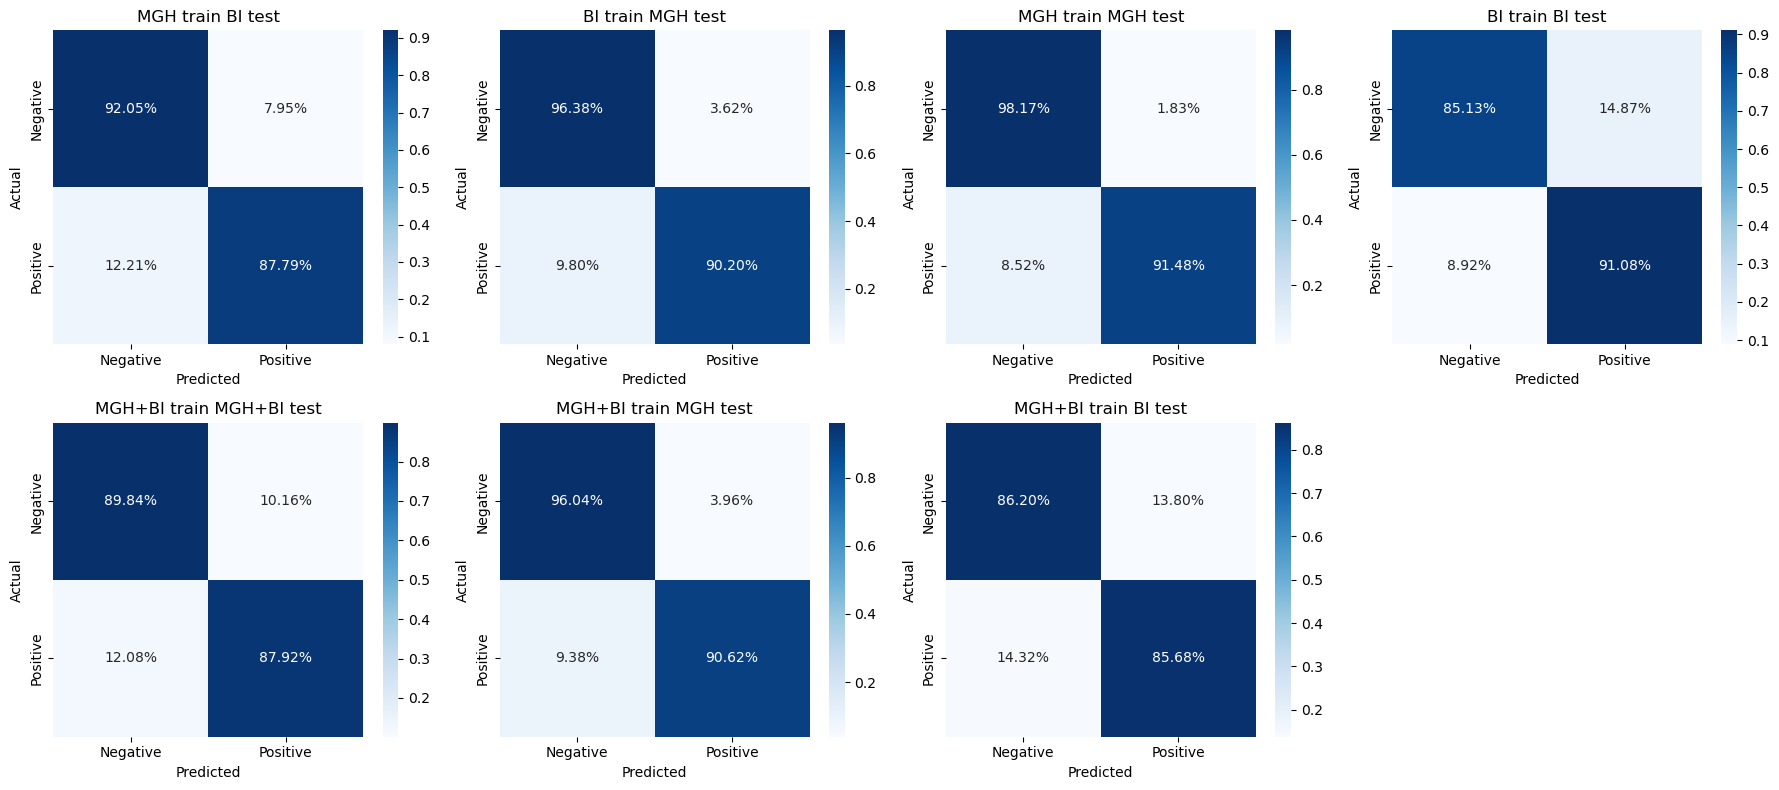

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np

# Load the confusion matrices from the pickle file
with open('confusion_matrices1.pkl', 'rb') as f:
    cm_data = pickle.load(f)

# Plotting the confusion matrices as percentages
plt.figure(figsize=(18, 8))

titles = [
    'MGH train BI test', 'BI train MGH test', 'MGH train MGH test',
    'BI train BI test', 'MGH+BI train MGH+BI test', 'MGH+BI train MGH test',
    'MGH+BI train BI test'
]

for i, (key, title) in enumerate(zip(cm_data, titles), 1):
    plt.subplot(2, 4, i)
    # Normalize the confusion matrix to show percentages
    cm_normalized = cm_data[key].astype('float') / cm_data[key].sum(axis=1)[:, np.newaxis]
    # Define tick labels for the heatmap
    tick_labels = ['Negative', 'Positive']
    sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues',
                xticklabels=tick_labels, yticklabels=tick_labels)
    plt.title(f'{title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()
plt.savefig('./combined_cm.png', dpi=1000, bbox_inches='tight')
